In [1]:
import numpy as np
import math
import torch
import matplotlib.pyplot as plt

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
#figsiz_=(11,2.5*2)
figsiz_=(10,2.5*2)
fontsiz = 18


plt.rc('figure', figsize=figsiz_,dpi=100)
plt.rcParams['figure.figsize'] = figsiz_
plt.rc('font', family='serif', size=fontsiz)

In [12]:


f1 = lambda x: 2.0*torch.sin(x*2*math.pi*3.1)
#f2 = lambda x: 3.0*torch.sin(x*2*math.pi*2.1)
f2 = lambda x: 0.25*torch.sin(x*2*math.pi*1.1) + 0.5*x*torch.sin(x*2*math.pi*1.1) - 0.5
f3 = lambda x: 3.0*torch.sin(x*2*math.pi*4.1)

f= [f1,f2,f3]


nfull,nsub,nsub2=200,10,40

nchannels = 2
#nchannels = 3

x_lb,x_ub=0,4
#ratio=0.55
ratio=0.7



if nchannels == 2:
    idx11=np.sort(np.random.randint(int(nfull*ratio), size=(1, nsub)),axis=1)
    idx12=np.sort(np.random.randint(int(nfull*ratio), size=(1, nsub)),axis=1) + int(nfull*(1-ratio))
    idx=np.concatenate([idx11,idx12],axis=0)
    
elif nchannels == 3:
    idx11=np.sort(np.random.randint(int(nfull*ratio), size=(1, nsub)),axis=1)
    idx12=np.sort(np.random.randint(int(nfull*ratio), size=(1, nsub)),axis=1) + int(nfull*(1-ratio))
    idx13=np.sort(np.random.randint(int(nfull), size=(1, nsub)),axis=1)     
    idx=np.concatenate([idx11,idx12,idx13],axis=0)
else:
    pass
idx2=np.sort(np.random.randint(nfull, size=(nchannels, nsub2)),axis=1)


x_c = torch.cat([(torch.linspace(x_lb,x_ub,nfull)[idx[j]])[None,:] for j in range(nchannels)],dim=0)
x_t = torch.cat([(torch.linspace(x_lb,x_ub,nfull)[idx2[j]])[None,:] for j in range(nchannels)],dim=0)
y_c = torch.cat([f[j](x_c[j])[None,:] for j in range(nchannels)],dim=0)
y_t = torch.cat([f[j](x_t[j])[None,:] for j in range(nchannels)],dim=0)


x_f = torch.cat([torch.linspace(x_lb,x_ub,nfull)[None,:] for j in range(nchannels)],dim=0)
y_f = torch.cat([f[j](x_f[j])[None,:] for j in range(nchannels)],dim=0)


x_c=x_c.T.unsqueeze(dim=0)
y_c=y_c.T.unsqueeze(dim=0)
x_t=x_t.T.unsqueeze(dim=0)
y_t=y_t.T.unsqueeze(dim=0)
x_f=x_f.T.unsqueeze(dim=0)
y_f=y_f.T.unsqueeze(dim=0)

nb=3
xc=x_c.repeat(nb,1,1).unsqueeze(dim=-2)
yc=y_c.repeat(nb,1,1)
xt=x_t.repeat(nb,1,1).unsqueeze(dim=-2)
yt=y_t.repeat(nb,1,1)

xf=x_f.repeat(nb,1,1).unsqueeze(dim=-2)
yf=y_f.repeat(nb,1,1)


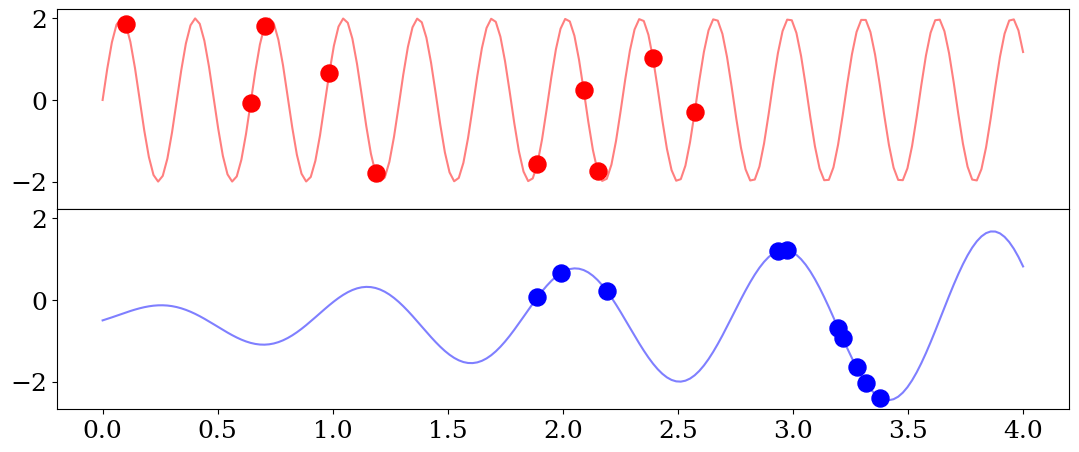

In [13]:
# import matplotlib.pyplot as plt
# figsiz_=(20,2.5*3)
# #delta=
#ylim_ = [-5-delta,5+delta]

#xlim_ = [0-delta,10+delta]
delta_x = 0.1
delta_y = 0.1
y_=5
xlim_ = [x_lb-delta_x,x_ub+delta_x]
ylim_ = [-y_-delta_y,y_+delta_y]
color_list = ['r','b','g']
xtick_ = list(np.arange(x_ub+1.))
ytick_ = [-(y_-1),0,(y_-1)]




fig, (ax1, ax2 ) = plt.subplots(nrows=2, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)

ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)

ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

plt.show()

In [14]:
from test_gpsampler4 import  Independent_GPsampler
from test_gpsampler7 import Spikeslab_GPsampler
from test_baseline import Convcnp


In [22]:
#num_channels = 3
cnntype='shallow'
#cnntype='deep'
 
num_channels = nchannels
in_dims,out_dims = 1,1
multiplier = 2**6 if cnntype=='deep' else 2**3
num_fourierbasis = 10



init_lscale0=.1
convcnp = Convcnp(in_dims=1,out_dims=1,num_channels=num_channels,init_lengthscale=init_lscale0,cnntype=cnntype)



init_lscale=1.0
#init_lscale=0.5
i_gpsampler = Independent_GPsampler(in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)
s_gpsampler = Spikeslab_GPsampler(in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, scales=init_lscale,num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)



spikeslab version 7 with tempering 0.1


In [23]:
import matplotlib.pyplot as plt
#figsiz_=(8,2.5*2)
delta_x=0.1
delta_y=0.2
ylim_ = [-4-delta_y,4+delta_y]
xlim_ = [x_lb-delta_x,x_ub+delta_x]
xtick_ = list(np.arange(x_ub))

alpha_=0.35

# Prior sampling

In [24]:
numsamples=4

----------------------------------------------------------------------------------------------------
Indepdent stationary prior sampling with 4 sample functions
----------------------------------------------------------------------------------------------------


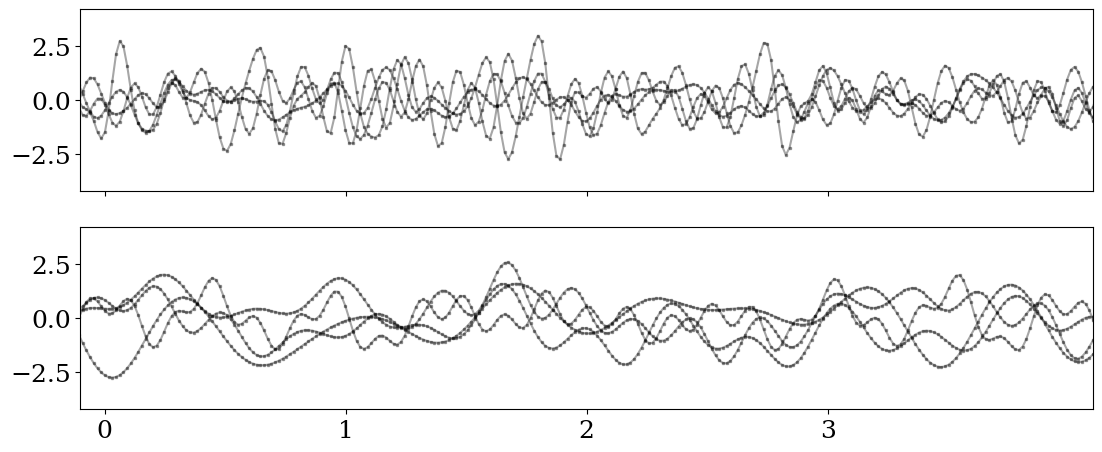





----------------------------------------------------------------------------------------------------
Task-depedent stationary prior sampling with 4 sample functions
----------------------------------------------------------------------------------------------------


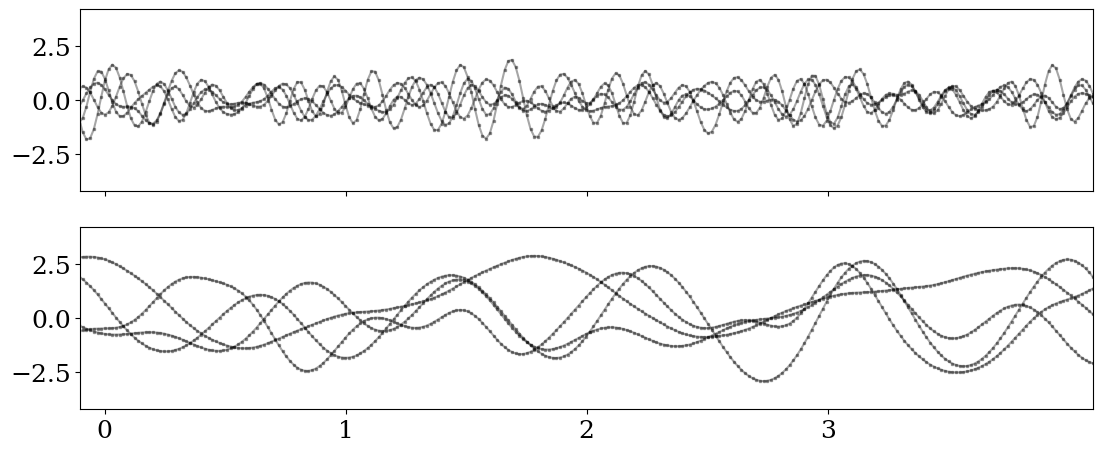

In [25]:
print('-'*100)
print('Indepdent stationary prior sampling with {} sample functions'.format(numsamples))
print('-'*100)

prior_samples ,xa_samples = i_gpsampler.sample_prior_shared(xc,yc,xt,numsamples=numsamples,reorder=False)
#print('xa_samples.shape {}'.format(xa_samples.shape))

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
for j in range(numsamples):
    ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,0].cpu().data.numpy(),'k'+'s-',alpha=alpha_,markersize=2)      
    ax1.set(xlim=xlim_,ylim=ylim_)
    #ax1.set_ylim(ylim_)
    
    
    ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,1].cpu().data.numpy(),'k'+'s-',alpha=alpha_,markersize=2)      
    ax2.set(xlim=xlim_,ylim=ylim_)
    
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
plt.show()

print('\n'*3)


print('-'*100)
print('Task-depedent stationary prior sampling with {} sample functions'.format(numsamples))
print('-'*100)
prior_samples ,xa_samples,_ = s_gpsampler.sample_prior_shared(xc,yc,xt,numsamples=numsamples,reorder=False)
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

#for i in range(nchannels):
for j in range(numsamples):
    ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,0].cpu().data.numpy(),'k'+'s-',alpha=alpha_,markersize=2)      
    ax1.set(xlim=xlim_,ylim=ylim_)
    #ax1.set_ylim(ylim_)
    
    
    ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,1].cpu().data.numpy(),'k'+'s-',alpha=alpha_,markersize=2)      
    ax2.set(xlim=xlim_,ylim=ylim_)
    
    
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
plt.show()

#

In [26]:
alpha_ = 0.5

# Functional representations (posterior sampling)

## convcnp + functional features

------------------------------------------------------------------------------------------------------------------------------------------------------
Data represenation of Convolutaional Deep sets
------------------------------------------------------------------------------------------------------------------------------------------------------


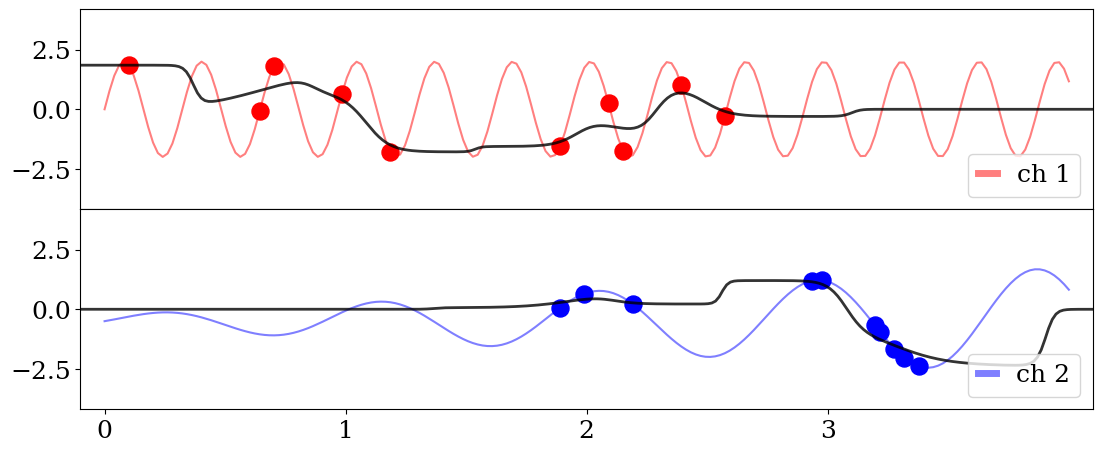




------------------------------------------------------------------------------------------------------------------------------------------------------
Indepededent random functional represenation of Bayesian Convolutaional Deep sets
------------------------------------------------------------------------------------------------------------------------------------------------------


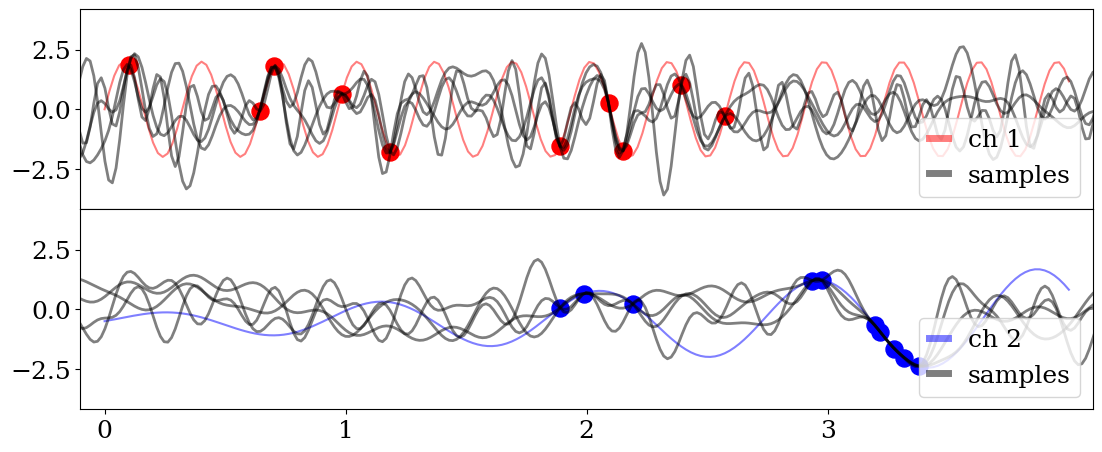




------------------------------------------------------------------------------------------------------------------------------------------------------
Task-depedent random functional represenation of Bayesian Convolutaional Deep sets
------------------------------------------------------------------------------------------------------------------------------------------------------


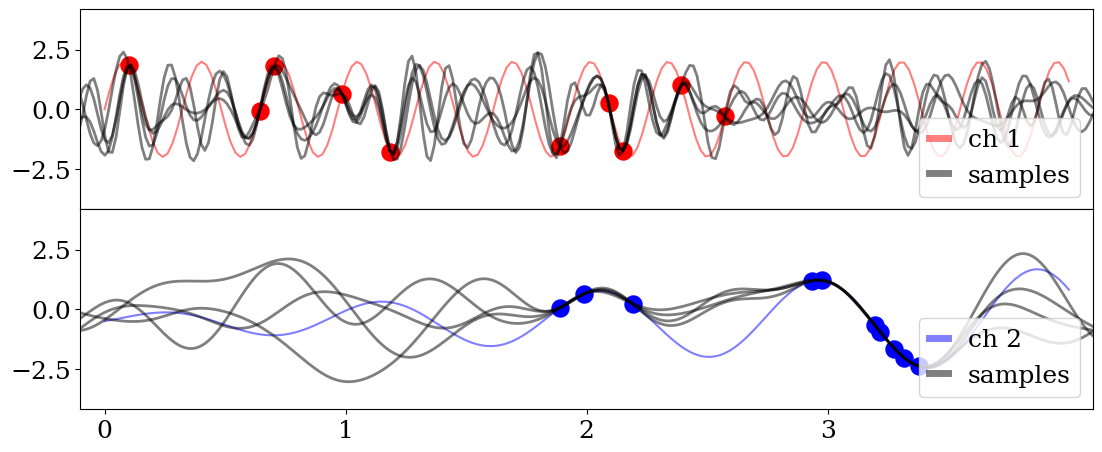

In [27]:

xgrid = convcnp.compute_xgrid(xc.squeeze(),yc,xt.squeeze())
_,nh1,h1,h0 = convcnp.encoder(xc.squeeze(),yc,xgrid.squeeze())

print('-'*150)
print('Data represenation of Convolutaional Deep sets'.format(1))
print('-'*150)
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

#for j in range(numsamples):
    #ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
    #ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
ax1.plot(xgrid[0,:,0].cpu().data.numpy(),nh1[0,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
ax2.plot(xgrid[0,:,1].cpu().data.numpy(),nh1[0,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

    
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
# ax1.set_yticks(ytick_)
# ax2.set_yticks(ytick_)

leg_pos = 'lower right'
leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

for line in leg1.get_lines():
    line.set_linewidth(5) 
for line in leg2.get_lines():
    line.set_linewidth(5) 
plt.show()
print('\n'*2)


#------------------------------------------------------------------------------------------------------------------------------------------------------
#Indepdent stationary prior sampling 
print('-'*150)
print('Indepededent random functional represenation of Bayesian Convolutaional Deep sets'.format(1))
print('-'*150)
outs = i_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
xa_samples,posterior_samples = outs.xa_samples,outs.posterior_samples
#posterior_samples = posterior_samples/(denrep[:,None,:,:]+1e-6)


fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

for j in range(numsamples):
#     ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=alpha_,linewidth=2)      
#     ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=alpha_,linewidth=2)      
    if j == 0:
        ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=alpha_,linewidth=2,label='samples')      
        ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=alpha_,linewidth=2,label='samples')      
    else:
        ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=alpha_,linewidth=2)      
        ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=alpha_,linewidth=2)      
    
        
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
# ax1.set_yticks(ytick_)
# ax2.set_yticks(ytick_)

leg_pos = 'lower right'
leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

for line in leg1.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)
for line in leg2.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)     


plt.show()
print('\n'*2)







print('-'*150)
print('Task-depedent random functional represenation of Bayesian Convolutaional Deep sets'.format(1))
print('-'*150)
#-------------------------------
outs = s_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
xa_samples,posterior_samples = outs.xa_samples,outs.posterior_samples
#posterior_samples = posterior_samples/(denrep[:,None,:,:]+1e-6)



fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)

ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

for j in range(numsamples):
    if j == 0:
        ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=alpha_,linewidth=2,label='samples')      
        ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=alpha_,linewidth=2,label='samples')      
    else:
        ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=alpha_,linewidth=2)      
        ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=alpha_,linewidth=2)      
    
    
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
# ax1.set_yticks(ytick_)
# ax2.set_yticks(ytick_)

leg_pos = 'lower right'
leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

for line in leg1.get_lines():
    line.set_linewidth(5) 
for line in leg2.get_lines():
    line.set_linewidth(5) 
plt.show()




<!-- # Check task-depedent prior  -->

In [ ]:
import torch.nn.functional as F